In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
cx = pd.read_csv("diffcx_2p02MeV.csv")
print(cx)

      omega  theta   sigma
0    12.640  15.23  9.9700
1    18.870  18.63  1.5640
2    25.050  21.50  0.4960
3    31.216  24.04  0.2910
4    37.330  26.32  0.2710
5    61.170  33.89  0.1878
6    72.620  37.03  0.1540
7    90.120  41.44  0.1262
8   104.600  44.81  0.1402
9   114.370  46.98  0.1795
10  132.620  50.83  0.2790
11  149.370  54.19  0.3860
12  168.030  57.77  0.4750


In [5]:
cx_theta = list(cx['theta'])
cx_sigma = list(cx['sigma'])

In [50]:
print([np.deg2rad(i) for i in cx_theta])

[0.2658136450787364, 0.32515483964654357, 0.3752457891787809, 0.4195771521794368, 0.45937065912490754, 0.5914920835008783, 0.6462954220135002, 0.7232644420264501, 0.7820820378186591, 0.819955682586936, 0.8871508587887177, 0.9457939216557272, 1.0082767088771243]


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_102109/3145293672.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("$\sigma$ (barns)")


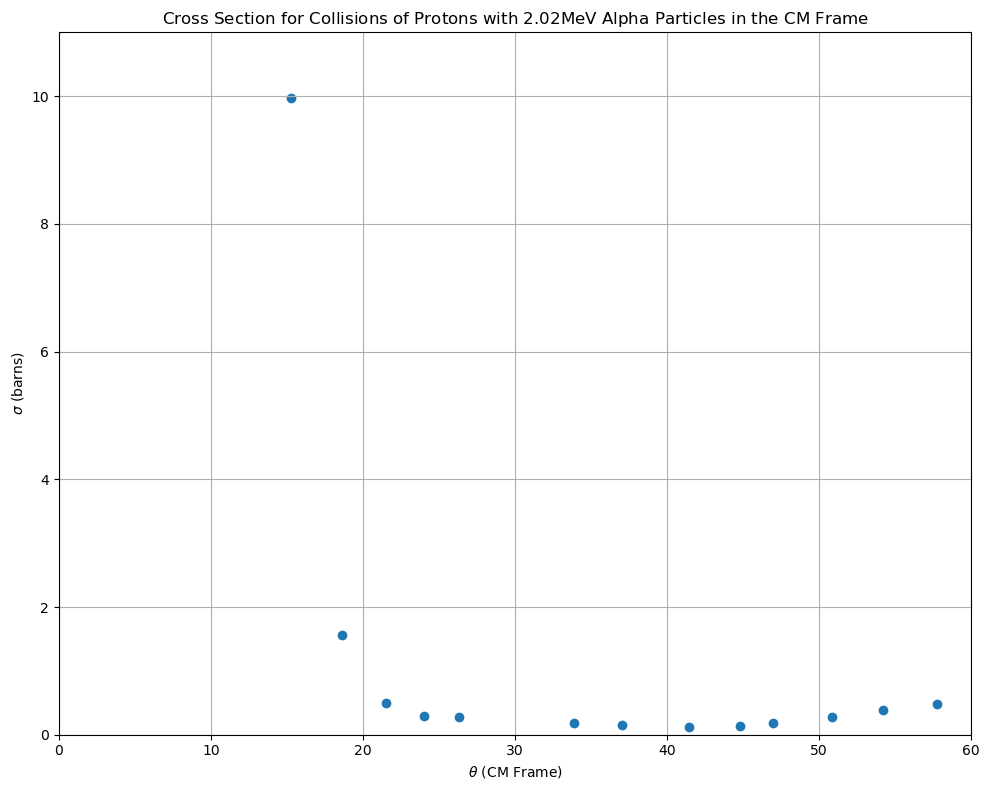

In [19]:
plt.scatter(cx_theta, cx_sigma)
plt.xlabel(r'$\theta$ (CM Frame)')
plt.ylabel("$\sigma$ (barns)")
plt.grid()
plt.title("Cross Section for Collisions of Protons with $2.02$MeV Alpha Particles in the CM Frame")
plt.ylim((0, 11))
plt.xlim((0, 60))
plt.tight_layout()
plt.savefig("exp_cx_plot.jpg")
plt.show()

In [44]:
def diff_cx(theta, ke, fname="diffcx_2p02MeV.csv") -> np.float64:
    exp_cx = pd.read_csv(fname)
    theta = np.rad2deg(theta)
    for k in exp_cx.index:
        if theta <= exp_cx['theta'][0]:
            # for low scattering angles which we don't have better data for 
            # (ie. below 12 degrees )
            # nvm 1/x makes a lot more sense here lol
            return 2*np.pi*((1/(0.3868*theta))) 
        elif theta <= exp_cx["theta"][k+1] and theta >= exp_cx['theta'][k]:
            #theta_low = exp_cx['theta'][k]
            #cx_low = exp_cx['sigma'][k]
            #theta_high = exp_cx['theta'][k+1]
            #cx_high = exp_cx['sigma'][k+1]
            #return 2*np.pi*( ((cx_high - cx_low)/(theta_high -
            #theta_low))*theta)
            return 2*np.pi*np.interp(theta, list(exp_cx['theta']), list(exp_cx['sigma']))
        elif theta >= list(exp_cx['theta'])[-1]:
            return 2*np.pi*((list(exp_cx['sigma'])[-1] - list(exp_cx['sigma'])[-2])/(list(exp_cx['theta'])[-1] - list(exp_cx['theta'])[-2]))*theta

In [45]:
cx_trange = np.linspace(np.deg2rad(14), np.deg2rad(50), 100)
cx_xrange = [diff_cx(i, 8) for i in cx_trange]
print(diff_cx(0.266, 8))

62.47749286301249


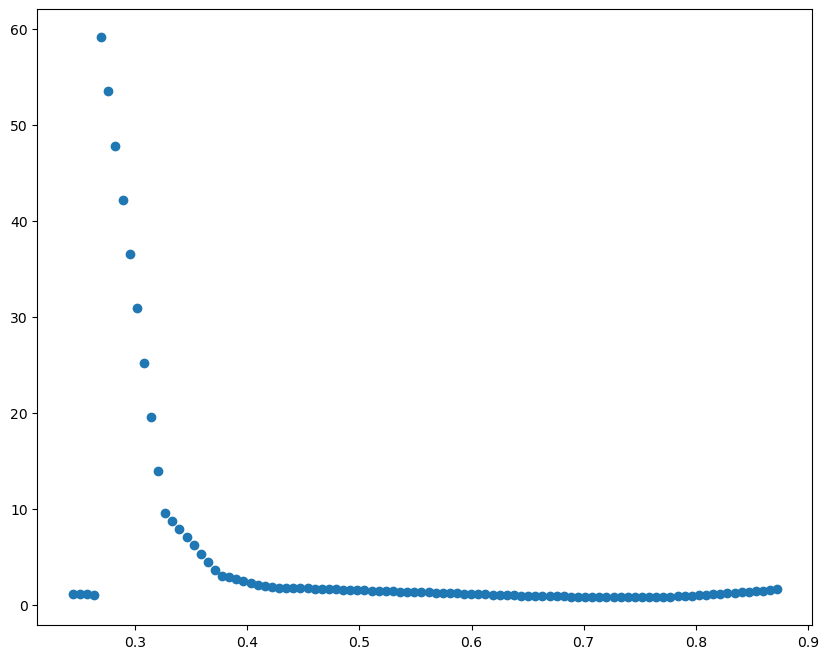

In [46]:
plt.scatter(cx_trange, cx_xrange)